<a href="https://colab.research.google.com/github/Pritija11/Assignment-I/blob/main/2462345_PRITIJA_GHISING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Problem-1:


1. Extract Latest Year:

      • Identify unique years in the dataset.

      • Filter the dataset to include only observations from the year 2022.

      • Save the filtered dataframe as hdi 2022 df (used for all subsequent tasks in Problem 1A).

In [ ]:
import pandas as pd
# Loading dataset
df = pd.read_csv("/content/drive/MyDrive/Assignment/Human_Development_Index_Dataset.csv", encoding='latin1')

last_country_index = df[df["country"] == "Zimbabwe"].index.max()

df = df.loc[:last_country_index]

# Extracting unique Year
unique_years = df["year"].unique()
print("Unique years :", unique_years)





Unique years : [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022]


In [ ]:
# filtering the dataset to include only observations from the year 2022
hdi_2022_df = df.loc[df["year"] == 2022].copy()



2. Data Exploration:
• Display the first 10 rows of the 2022 dataset.
• Count the number of rows and columns.
• List all column names and their data types.

In [ ]:
# Displaying first 10 rows
print("First 10 rows:",hdi_2022_df.head(10))



First 10 rows:      Unnamed: 0 iso3              country  year    hdi  life_expectancy  \
32           33  AFG          Afghanistan  2022  0.462           62.879   
65           66  ALB              Albania  2022  0.789           76.833   
98           99  DZA              Algeria  2022  0.745           77.129   
131         132  AND              Andorra  2022  0.884           83.552   
164         165  AGO               Angola  2022  0.591           61.929   
197         198  ATG  Antigua and Barbuda  2022  0.826           79.236   
230         231  ARG            Argentina  2022  0.849           76.064   
263         264  ARM              Armenia  2022  0.786           73.372   
296         297  AUS            Australia  2022  0.946           83.579   
329         330  AUT              Austria  2022  0.926           82.412   

     pop_millions     hdi_f     hdi_m  life_expec_f  ...  gender_development  \
32      41.128771  0.332443  0.534145        66.213  ...               0.622   

In [ ]:
# counting number of rows and columns
rows, columns = hdi_2022_df.shape
print("Number of rows:", rows)
print("Number of columns:", columns)

Number of rows: 195
Number of columns: 30


In [ ]:
# listing all column names and their data type
print("Column names and their datatypes:")
print(hdi_2022_df.dtypes)

Column names and their datatypes:
Unnamed: 0                     int64
iso3                          object
country                       object
year                           int64
hdi                          float64
life_expectancy              float64
pop_millions                 float64
hdi_f                        float64
hdi_m                        float64
life_expec_f                 float64
life_expec_m                 float64
expec_yr_school              float64
expec_yr_school_f            float64
expec_yr_school_m            float64
mean_yr_school               float64
mean_yr_school_f             float64
mean_yr_school_m             float64
gross_inc_percap             float64
gross_inc_percap_f           float64
gross_inc_percap_m           float64
gender_development           float64
gender_inequality            float64
secondary_education_f_%      float64
secondary_education_m_%      float64
seats_in_parliament_f_%      float64
seats_in_parliament_m_%      float64
labo

3. Missing Values & Data Cleaning:
• Check for missing values in each column and report total counts.
• Inspect dataset for:
– numeric columns stored as text,
– inconsistent or misspelled country names,
– duplicate rows,
– special characters (e.g., “–”) representing missing data.
• Apply necessary cleaning steps:
– convert data types where needed,
– remove duplicates,
– handle missing values (drop or impute; justify your choice).

In [ ]:
# checking for missing values in each columns
missing_values = hdi_2022_df.isnull().sum()
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
Unnamed: 0                    0
iso3                          0
country                       0
year                          0
hdi                           2
life_expectancy               0
pop_millions                  0
hdi_f                        13
hdi_m                        13
life_expec_f                  0
life_expec_m                  0
expec_yr_school               1
expec_yr_school_f             1
expec_yr_school_m             1
mean_yr_school                2
mean_yr_school_f              2
mean_yr_school_m              2
gross_inc_percap              2
gross_inc_percap_f           13
gross_inc_percap_m           13
gender_development           13
gender_inequality            29
secondary_education_f_%      17
secondary_education_m_%      17
seats_in_parliament_f_%       2
seats_in_parliament_m_%       2
labour_participation_f_%     12
labour_participation_m_%     12
co2_emission_tons             2
mat_footprint_percap_tons    41

In [ ]:
# checking numeric column stored as text

nummeric_col_text = hdi_2022_df.select_dtypes(include="object").columns
print("columns stored as text:")
print(nummeric_col_text)


columns stored as text:
Index(['iso3', 'country'], dtype='object')


In [ ]:
#  inconsistent or mispelled countries name
pd.set_option('display.max_rows', None)
print(hdi_2022_df['country'].value_counts())


country
Afghanistan                            1
Albania                                1
Algeria                                1
Andorra                                1
Angola                                 1
Antigua and Barbuda                    1
Argentina                              1
Armenia                                1
Australia                              1
Austria                                1
Azerbaijan                             1
Bahamas                                1
Bahrain                                1
Bangladesh                             1
Barbados                               1
Belarus                                1
Belgium                                1
Belize                                 1
Benin                                  1
Bhutan                                 1
Bolivia (Plurinational State of)       1
Bosnia and Herzegovina                 1
Botswana                               1
Brazil                                 1
Brunei D

In [ ]:
# checking for duplicate rows

duplicate_rows = hdi_2022_df.duplicated().sum()
print("Number of duplicate rows:")
print(duplicate_rows)


Number of duplicate rows:
0


In [ ]:
# checking if special characters exists as missing data
special_chars = ['-', '–', '—', 'NA', 'N/A', 'n/a', '', ' ']

for col in hdi_2022_df.columns:
    cleaned_column = hdi_2022_df[col].astype(str).str.strip()
    count = cleaned_column.isin(special_chars).sum() + hdi_2022_df[col].isna().sum()
    print(f"{col}: {count}")


Unnamed: 0: 0
iso3: 0
country: 0
year: 0
hdi: 2
life_expectancy: 0
pop_millions: 0
hdi_f: 13
hdi_m: 13
life_expec_f: 0
life_expec_m: 0
expec_yr_school: 1
expec_yr_school_f: 1
expec_yr_school_m: 1
mean_yr_school: 2
mean_yr_school_f: 2
mean_yr_school_m: 2
gross_inc_percap: 2
gross_inc_percap_f: 13
gross_inc_percap_m: 13
gender_development: 13
gender_inequality: 29
secondary_education_f_%: 17
secondary_education_m_%: 17
seats_in_parliament_f_%: 2
seats_in_parliament_m_%: 2
labour_participation_f_%: 12
labour_participation_m_%: 12
co2_emission_tons: 2
mat_footprint_percap_tons: 41


4. Basic Statistics:
• Compute the mean, median, and standard deviation of HDI for the year 2022.
• Identify the country with the highest HDI in 2022.
• Identify the country with the lowest HDI in 2022.

In [ ]:
# computing mean, median, and standard deviation of HDI for the year 2022
hdi_mean = hdi_2022_df["hdi"].mean()
print("Mean for HDI:", hdi_mean)
hdi_median = hdi_2022_df["hdi"].median()
print("Median for HDI:", hdi_median)
hdi_std = hdi_2022_df["hdi"].std()
print("Standard deviation for HDI:", hdi_std)



Mean for HDI: 0.7331768707482993
Median for HDI: 0.76
Standard deviation for HDI: 0.1601509861520783


In [ ]:
# checking the country with the highest HDI in 2022
highest_hdi = hdi_2022_df["hdi"].idxmax()
highest_hdi_country = hdi_2022_df.loc[highest_hdi, "country"]
print("Country with highest HDI value:")
print(highest_hdi_country)

# checking the country with the lowest HDI in 2022
lowest_hdi = hdi_2022_df["hdi"].idxmin()
lowest_hdi_country = hdi_2022_df.loc[lowest_hdi, "country"]
print("Country with lowest HDI value:")
print(lowest_hdi_country)


Country with highest HDI value:
Switzerland
Country with lowest HDI value:
Somalia


5. Filtering and Sorting:
• Filter countries with HDI {"hdi"} greater than 0.800.
• Sort this filtered dataset by Gross National Income (GNI) per Capita {"gross inc percap"} in
descending order.
• Display the top 10 countries.

In [ ]:
# Filtering countries with hdi greater than 0.800

high_hdi_countries = hdi_2022_df.loc[hdi_2022_df["hdi"] > 0.800]



In [ ]:
# Sorting the filtered dataset by GNI per capita in descending order

high_hdi_countries_srt = high_hdi_countries.sort_values(by="gross_inc_percap", ascending=False)


In [ ]:
# Displaying top 10 countries after sorting
top_10_countries = high_hdi_countries_srt.head(10)
print("Top 10 countries:")
print(top_10_countries[['country', 'hdi', 'gross_inc_percap']])

Top 10 countries:
                     country    hdi  gross_inc_percap
3332           Liechtenstein  0.942      146673.24150
4718                   Qatar  0.875       95944.37754
5213               Singapore  0.949       88761.14559
2705                 Ireland  0.950       87467.51391
3398              Luxembourg  0.927       78554.23640
6104    United Arab Emirates  0.937       74103.71494
5609             Switzerland  0.967       69432.78669
4322                  Norway  0.966       69189.76165
6170           United States  0.927       65564.93798
2474  Hong Kong, China (SAR)  0.956       62485.50516


6. Adding HDI Category Column:
• Create a new column HDI Category that classifies each country into one of the four official
Human Development Index groups. The classification should be based on the HDI value for the
year 2022. Use the following categories and thresholds defined by the United Nations Development
Programme (UNDP):   
After creating this new column:
• verify that all countries are classified correctly,
• ensure the updated dataframe includes the new category column.
• Save the final dataframe as HDI category added.csv and include this file in your final
submission.

In [ ]:
# Adding new column

def hdi_category(hdi):
    if hdi < 0.550:
        return 'Low'
    elif hdi < 0.700:
        return 'Medium'
    elif hdi < 0.800:
        return 'High'
    else:
        return 'Very High'

hdi_2022_df['HDI_Category'] = hdi_2022_df['hdi'].apply(hdi_category)



In [ ]:
# verifying all countries are classified correctly
check_countries = hdi_2022_df['HDI_Category'].value_counts().reset_index()
check_countries.columns = ['HDI_Category', 'Number of Countries']

print(check_countries)


  HDI_Category  Number of Countries
0    Very High                   58
1         High                   35
2       Medium                   28
3          Low                   26


In [ ]:
# checking the updated dataframe includes the new category column
print("Updated dataset:")
print(hdi_2022_df[['country', 'hdi', 'HDI_Category']].head(10))

Updated dataset:
         country    hdi HDI_Category
32   Afghanistan  0.462          Low
65       Albania  0.789         High
98       Algeria  0.745         High
164       Angola  0.591       Medium
230    Argentina  0.849    Very High
263      Armenia  0.786         High
296    Australia  0.946    Very High
329      Austria  0.926    Very High
362   Azerbaijan  0.760         High
395      Bahamas  0.820    Very High


In [ ]:
# saving final dataframe as HDI_category_added
hdi_2022_df.to_csv("/content/drive/MyDrive/Assignment/HDI_category_added.csv", index=False)

In [ ]:
# Problem-1B

1. Data Extraction and Saving:
• Filter the dataset to include only the years 2020, 2021, and 2022.
• Save the filtered dataset as HDI problem1B.csv.
• Use this cleaned dataset for all subsequent tasks in Problem 1B.

In [ ]:
# Filtering the dataset to include only years: 2020, 2021 and 2022
hdi_2020_to_2022_df = df.loc[df["year"].isin([2020, 2021, 2022])]
print(hdi_2020_to_2022_df)

      Unnamed: 0 iso3                              country  year    hdi  \
30            31  AFG                          Afghanistan  2020  0.488   
31            32  AFG                          Afghanistan  2021  0.473   
32            33  AFG                          Afghanistan  2022  0.462   
63            64  ALB                              Albania  2020  0.784   
64            65  ALB                              Albania  2021  0.785   
65            66  ALB                              Albania  2022  0.789   
96            97  DZA                              Algeria  2020  0.730   
97            98  DZA                              Algeria  2021  0.740   
98            99  DZA                              Algeria  2022  0.745   
129          130  AND                              Andorra  2020  0.843   
130          131  AND                              Andorra  2021  0.855   
131          132  AND                              Andorra  2022  0.884   
162          163  AGO    

In [ ]:
# saving filtered data set to new csv file
hdi_2020_to_2022_df.to_csv("/content/drive/MyDrive/Assignment/HDI_problem1B.csv")


2. Data Cleaning:
• Check for missing values in the following essential columns:
– hdi
– country
– year
• Identify and address the following issues:
– missing or null values,
– inconsistent or misspelled country names,
– duplicate rows,
– numeric columns stored as text or containing non-numeric symbols (e.g., “–”).
• Apply and justify cleaning steps, including:
– handling missing values (dropping or imputing),
– converting data types appropriately,
– removing duplicate entries,
– ensuring consistent naming conventions for countries and years.

In [ ]:
# loading the dataset
import pandas as pd
import numpy as np

hdi_problem1B_df = pd.read_csv("/content/drive/MyDrive/Assignment/HDI_problem1B.csv")


In [ ]:
# checking for missing values in specified columns

cols_to_check = ["hdi", "country", "year"]
missing_values_in_cols = hdi_problem1B_df[cols_to_check].isnull().sum()
print("Missing values :")
print(missing_values_in_cols)

Missing values :
hdi        8
country    0
year       0
dtype: int64


In [ ]:
# checking for missing or null values for datset
missing_values = hdi_problem1B_df.isnull().sum()
print(missing_values)

Unnamed: 0.1                   0
Unnamed: 0                     0
iso3                           0
country                        0
year                           0
hdi                            8
life_expectancy                0
pop_millions                   0
hdi_f                         41
hdi_m                         41
life_expec_f                   0
life_expec_m                   0
expec_yr_school                5
expec_yr_school_f              5
expec_yr_school_m              5
mean_yr_school                 8
mean_yr_school_f               8
mean_yr_school_m               8
gross_inc_percap               6
gross_inc_percap_f            39
gross_inc_percap_m            39
gender_development            41
gender_inequality             89
secondary_education_f_%       53
secondary_education_m_%       53
seats_in_parliament_f_%        6
seats_in_parliament_m_%        6
labour_participation_f_%      36
labour_participation_m_%      36
co2_emission_tons              6
mat_footpr

In [ ]:
# checking inconsistent or misspelled country names
pd.set_option('display.max_rows', None)
print(hdi_2022_df['country'].value_counts())


country
Afghanistan                           1
Albania                               1
Algeria                               1
Angola                                1
Argentina                             1
Armenia                               1
Australia                             1
Austria                               1
Azerbaijan                            1
Bahamas                               1
Bahrain                               1
Bangladesh                            1
Belgium                               1
Belize                                1
Benin                                 1
Bhutan                                1
Bolivia (Plurinational State of)      1
Bosnia and Herzegovina                1
Botswana                              1
Brazil                                1
Brunei Darussalam                     1
Bulgaria                              1
Burkina Faso                          1
Burundi                               1
Cambodia                        

In [ ]:
# checking for duplicate rows
duplicate_rows = hdi_problem1B_df.duplicated().sum()
print("Number of duplicate rows:")
print(duplicate_rows)

Number of duplicate rows:
0


In [ ]:
# checking numeric columns stored as text
numeric_col_check = hdi_problem1B_df.select_dtypes(include="object").columns
print(" columns stored as text:")
print(numeric_col_check)

 columns stored as text:
Index(['iso3', 'country'], dtype='object')


In [ ]:
# checking if columns contains special  symbol
special_chars = ['-', '–', '—',  ' ']
for col in hdi_problem1B_df.columns:
  count = (hdi_problem1B_df[col].isin(special_chars)).sum()
  if count > 0:
    print(f"special character found in column '{col}': {count}")

else:
  print("No special character found")


No special character found


In [ ]:
# checking if NaN values exists
print("Missing (NaN) values per column:")
print(hdi_2022_df.isna().sum())


Missing (NaN) values per column:
Unnamed: 0                   0
iso3                         0
country                      0
year                         0
hdi                          0
life_expectancy              0
pop_millions                 0
hdi_f                        0
hdi_m                        0
life_expec_f                 0
life_expec_m                 0
expec_yr_school              0
expec_yr_school_f            0
expec_yr_school_m            0
mean_yr_school               0
mean_yr_school_f             0
mean_yr_school_m             0
gross_inc_percap             0
gross_inc_percap_f           0
gross_inc_percap_m           0
gender_development           0
gender_inequality            0
secondary_education_f_%      0
secondary_education_m_%      0
seats_in_parliament_f_%      0
seats_in_parliament_m_%      0
labour_participation_f_%     0
labour_participation_m_%     0
co2_emission_tons            0
mat_footprint_percap_tons    0
HDI_Category                 0
dtype:

In [ ]:
# dropping the columns having missing values
print("Rows before dropping:", len(hdi_problem1B_df))
hdi_problem1B_df_drop = hdi_problem1B_df.dropna()
print("Rows after dropping:", len(hdi_problem1B_df_drop))

Rows before dropping: 585
Rows after dropping: 439


3. Visualization Tasks:
• A. Line Chart — HDI Trend (Country-Level):
– Select any five countries (or five countries from a region of your choice).
– Plot HDI values for each country across the years 2020, 2021, and 2022.
– Ensure the chart includes appropriate axis labels, a legend, and an informative caption.

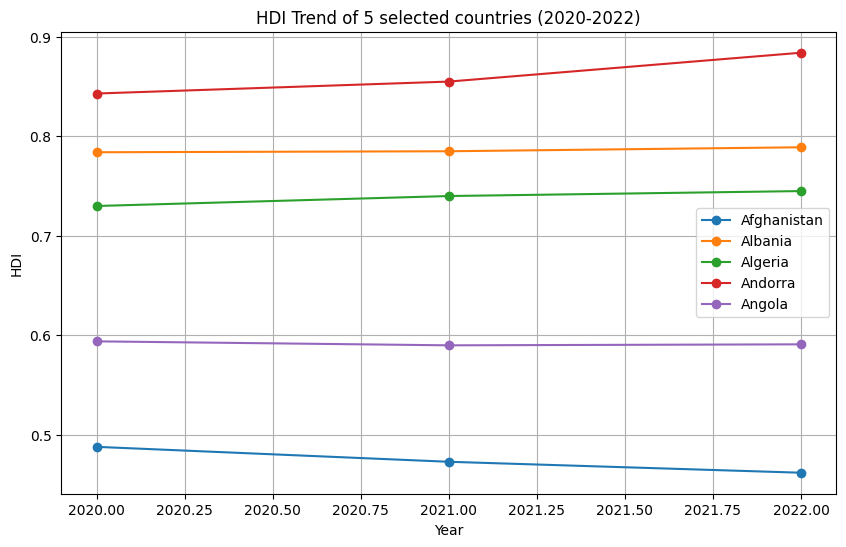

In [ ]:
# line chart
import matplotlib.pyplot as plt
# selecting any 5 countries
countries = ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola']
hdi_countries_df = hdi_problem1B_df[hdi_problem1B_df["country"].isin(countries)]

# plotting HDI trends

plt.figure(figsize=(10,6))

for country in countries:
  selected_countries = hdi_countries_df[hdi_countries_df["country"] == country]
  plt.plot(selected_countries["year"], selected_countries["hdi"], marker='o',
           label=country)

plt.xlabel("Year")
plt.ylabel("HDI")
plt.title("HDI Trend of 5 selected countries (2020-2022)")
plt.legend()
plt.grid(True)
plt.show()



B. Generate Visualizations:
– Bar Chart: Average HDI by Region (2020–2022)
∗ Group the dataset by Region and Year.
∗ Compute the mean HDI for each region-year pair.
∗ Plot a bar chart comparing average HDI across regions for each year.
∗ Label axes clearly and include a descriptive title.

In [ ]:
# Bar chart for mean HDI by region(2020-2022)
region_map = {

    # East Asia & Pacific
    "Australia": "East Asia & Pacific",
    "Brunei Darussalam": "East Asia & Pacific",
    "Cambodia": "East Asia & Pacific",
    "China": "East Asia & Pacific",
    "Fiji": "East Asia & Pacific",
    "Indonesia": "East Asia & Pacific",
    "Japan": "East Asia & Pacific",
    "Kiribati": "East Asia & Pacific",
    "Korea (Republic Of)": "East Asia & Pacific",
    "Lao People'S Democratic Republic": "East Asia & Pacific",
    "Malaysia": "East Asia & Pacific",
    "Marshall Islands": "East Asia & Pacific",
    "Micronesia, Fed. Sts.": "East Asia & Pacific",
    "Mongolia": "East Asia & Pacific",
    "Myanmar": "East Asia & Pacific",
    "Nauru": "East Asia & Pacific",
    "New Zealand": "East Asia & Pacific",
    "Palau": "East Asia & Pacific",
    "Papua New Guinea": "East Asia & Pacific",
    "Philippines": "East Asia & Pacific",
    "Samoa": "East Asia & Pacific",
    "Singapore": "East Asia & Pacific",
    "Solomon Islands": "East Asia & Pacific",
    "Thailand": "East Asia & Pacific",
    "Timor-Leste": "East Asia & Pacific",
    "Tonga": "East Asia & Pacific",
    "Tuvalu": "East Asia & Pacific",
    "Vanuatu": "East Asia & Pacific",
    "Viet Nam": "East Asia & Pacific",

    # Europe & Central Asia
    "Albania": "Europe & Central Asia",
    "Armenia": "Europe & Central Asia",
    "Austria": "Europe & Central Asia",
    "Azerbaijan": "Europe & Central Asia",
    "Belarus": "Europe & Central Asia",
    "Belgium": "Europe & Central Asia",
    "Bosnia And Herzegovina": "Europe & Central Asia",
    "Bulgaria": "Europe & Central Asia",
    "Croatia": "Europe & Central Asia",
    "Cyprus": "Europe & Central Asia",
    "Czechia": "Europe & Central Asia",
    "Denmark": "Europe & Central Asia",
    "Estonia": "Europe & Central Asia",
    "Finland": "Europe & Central Asia",
    "France": "Europe & Central Asia",
    "Georgia": "Europe & Central Asia",
    "Germany": "Europe & Central Asia",
    "Greece": "Europe & Central Asia",
    "Hungary": "Europe & Central Asia",
    "Iceland": "Europe & Central Asia",
    "Ireland": "Europe & Central Asia",
    "Italy": "Europe & Central Asia",
    "Kazakhstan": "Europe & Central Asia",
    "Kyrgyzstan": "Europe & Central Asia",
    "Latvia": "Europe & Central Asia",
    "Lithuania": "Europe & Central Asia",
    "Luxembourg": "Europe & Central Asia",
    "Malta": "Europe & Central Asia",
    "Moldova (Republic Of)": "Europe & Central Asia",
    "Netherlands": "Europe & Central Asia",
    "North Macedonia": "Europe & Central Asia",
    "Norway": "Europe & Central Asia",
    "Poland": "Europe & Central Asia",
    "Portugal": "Europe & Central Asia",
    "Romania": "Europe & Central Asia",
    "Russian Federation": "Europe & Central Asia",
    "Serbia": "Europe & Central Asia",
    "Slovak Republic": "Europe & Central Asia",
    "Slovenia": "Europe & Central Asia",
    "Spain": "Europe & Central Asia",
    "Sweden": "Europe & Central Asia",
    "Switzerland": "Europe & Central Asia",
    "Türkiye": "Europe & Central Asia",
    "Tajikistan": "Europe & Central Asia",
    "Ukraine": "Europe & Central Asia",
    "United Kingdom": "Europe & Central Asia",
    "Uzbekistan": "Europe & Central Asia",

    # Latin America & Caribbean
    "Argentina": "Latin America & Caribbean",
    "Bahamas": "Latin America & Caribbean",
    "Barbados": "Latin America & Caribbean",
    "Belize": "Latin America & Caribbean",
    "Bolivia (Plurinational State Of)": "Latin America & Caribbean",
    "Brazil": "Latin America & Caribbean",
    "Chile": "Latin America & Caribbean",
    "Colombia": "Latin America & Caribbean",
    "Costa Rica": "Latin America & Caribbean",
    "Cuba": "Latin America & Caribbean",
    "Dominican Republic": "Latin America & Caribbean",
    "Ecuador": "Latin America & Caribbean",
    "El Salvador": "Latin America & Caribbean",
    "Guatemala": "Latin America & Caribbean",
    "Guyana": "Latin America & Caribbean",
    "Haiti": "Latin America & Caribbean",
    "Honduras": "Latin America & Caribbean",
    "Jamaica": "Latin America & Caribbean",
    "Mexico": "Latin America & Caribbean",
    "Nicaragua": "Latin America & Caribbean",
    "Panama": "Latin America & Caribbean",
    "Paraguay": "Latin America & Caribbean",
    "Peru": "Latin America & Caribbean",
    "Suriname": "Latin America & Caribbean",
    "Trinidad and Tobago": "Latin America & Caribbean",
    "Uruguay": "Latin America & Caribbean",
    "Venezuela (Bolivarian Republic Of)": "Latin America & Caribbean",

    # Middle East & North Africa
    "Algeria": "Middle East & North Africa",
    "Bahrain": "Middle East & North Africa",
    "Egypt": "Middle East & North Africa",
    "Iran (Islamic Republic Of)": "Middle East & North Africa",
    "Iraq": "Middle East & North Africa",
    "Israel": "Middle East & North Africa",
    "Jordan": "Middle East & North Africa",
    "Kuwait": "Middle East & North Africa",
    "Lebanon": "Middle East & North Africa",
    "Libya": "Middle East & North Africa",
    "Morocco": "Middle East & North Africa",
    "Oman": "Middle East & North Africa",
    "Qatar": "Middle East & North Africa",
    "Saudi Arabia": "Middle East & North Africa",
    "Tunisia": "Middle East & North Africa",
    "United Arab Emirates": "Middle East & North Africa",
    "Yemen": "Middle East & North Africa",

    # North America
    "Canada": "North America",
    "United States": "North America",

    # South Asia
    "Afghanistan": "South Asia",
    "Bangladesh": "South Asia",
    "Bhutan": "South Asia",
    "India": "South Asia",
    "Maldives": "South Asia",
    "Nepal": "South Asia",
    "Pakistan": "South Asia",
    "Sri Lanka": "South Asia",

    # Sub-Saharan Africa
    "Angola": "Sub-Saharan Africa",
    "Benin": "Sub-Saharan Africa",
    "Botswana": "Sub-Saharan Africa",
    "Burkina Faso": "Sub-Saharan Africa",
    "Burundi": "Sub-Saharan Africa",
    "Cameroon": "Sub-Saharan Africa",
    "Central African Republic": "Sub-Saharan Africa",
    "Chad": "Sub-Saharan Africa",
    "Congo (Democratic Republic Of The)": "Sub-Saharan Africa",
    "Congo": "Sub-Saharan Africa",
    "Côte d’Ivoire": "Sub-Saharan Africa",
    "Ethiopia": "Sub-Saharan Africa",
    "Gabon": "Sub-Saharan Africa",
    "Gambia": "Sub-Saharan Africa",
    "Ghana": "Sub-Saharan Africa",
    "Guinea": "Sub-Saharan Africa",
    "Kenya": "Sub-Saharan Africa",
    "Liberia": "Sub-Saharan Africa",
    "Madagascar": "Sub-Saharan Africa",
    "Malawi": "Sub-Saharan Africa",
    "Mauritania": "Sub-Saharan Africa",
    "Mali": "Sub-Saharan Africa",
    "Mozambique": "Sub-Saharan Africa",
    "Namibia": "Sub-Saharan Africa",
    "Niger": "Sub-Saharan Africa",
    "Nigeria": "Sub-Saharan Africa",
    "Rwanda": "Sub-Saharan Africa",
    "Senegal": "Sub-Saharan Africa",
    "Slovakia":"Sub-Saharan Africa",
    "Sierra Leone": "Sub-Saharan Africa",
    "Sudan": "Sub-Saharan Africa",
    "South Africa": "Sub-Saharan Africa",
    "Somalia": "Sub-Saharan Africa",
    "South Sudan": "Sub-Saharan Africa",
    "Tanzania (United Republic Of)": "Sub-Saharan Africa",
    "Togo": "Sub-Saharan Africa",
    "Tanzania": "Sub-Saharan Africa",
    "Uganda": "Sub-Saharan Africa",
    "Zambia": "Sub-Saharan Africa",
    "Zimbabwe": "Sub-Saharan Africa"
}
hdi_problem1B_df['Region'] = hdi_problem1B_df['country'].map(region_map)


# Check the first few rows
hdi_problem1B_df.head()

Countries without a region mapping:
['Andorra' 'Antigua and Barbuda' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Cabo Verde' 'Comoros'
 'Congo (Democratic Republic of the)' "Côte d'Ivoire" 'Djibouti'
 'Dominica' 'Equatorial Guinea' 'Eritrea' 'Eswatini (Kingdom of)'
 'Grenada' 'Guinea-Bissau' 'Hong Kong, China (SAR)'
 'Iran (Islamic Republic of)' "Korea (Democratic People's Rep. of)"
 'Korea (Republic of)' "Lao People's Democratic Republic" 'Lesotho'
 'Liechtenstein' 'Mauritius' 'Micronesia (Federated States of)'
 'Moldova (Republic of)' 'Monaco' 'Montenegro' 'Palestine, State of'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and the Grenadines'
 'San Marino' 'Sao Tome and Principe' 'Seychelles' 'Syrian Arab Republic'
 'Tanzania (United Republic of)' 'Turkmenistan'
 'Venezuela (Bolivarian Republic of)']


,Unnamed: 0.1,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,...,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons,Region
0,30,31,AFG,Afghanistan,2020,0.488,62.575,38.972231,0.381373,0.548741,...,0.674,6.092345,15.945160,27.215190,72.784810,16.50,66.84,0.305040,1.5554,South Asia
1,31,32,AFG,Afghanistan,2021,0.473,61.982,40.099462,0.379129,0.528559,...,0.653,6.395730,14.865710,27.215190,72.784810,23.33,77.09,0.306318,1.2351,South Asia
2,32,33,AFG,Afghanistan,2022,0.462,62.879,41.128771,0.332443,0.534145,...,0.665,7.042050,24.077040,27.215190,72.784810,23.33,77.09,0.306318,1.1809,South Asia
3,63,64,ALB,Albania,2020,0.784,76.989,2.866849,0.775404,0.793220,...,0.129,82.249185,86.476634,29.508197,70.491803,54.45,68.91,1.750668,10.4704,Europe & Central Asia
4,64,65,ALB,Albania,2021,0.785,76.463,2.854710,0.777866,0.792942,...,0.117,82.249185,86.476634,35.714286,64.285714,56.08,69.91,1.717758,11.5865,Europe & Central Asia


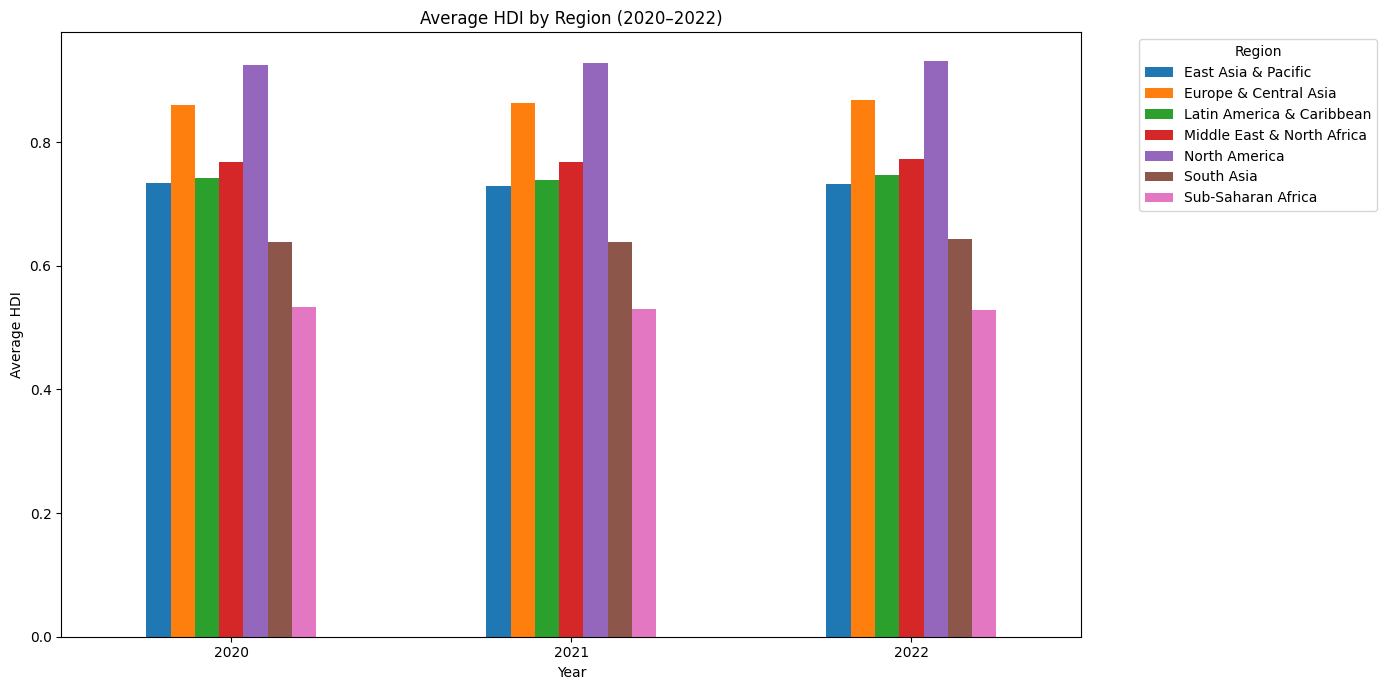

In [ ]:
# Bar chart
import matplotlib.pyplot as plt
import pandas as pd

# Group by Year and Region, calculate mean HDI
avg_region_year = hdi_problem1B_df.groupby(['year', 'Region'])['hdi'].mean().unstack()

# Plot grouped bar chart
avg_region_year.plot(kind='bar', figsize=(14,7))
plt.ylabel("Average HDI")
plt.xlabel("Year")
plt.title("Average HDI by Region (2020–2022)")
plt.xticks(rotation=0)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

– Box Plot: HDI Distribution for 2020, 2021, and 2022
∗ Filter the dataset for the years 2020, 2021, and 2022.
∗ Create a box plot showing HDI spread for each of the three years.
∗ Include titles and axis labels.
∗ Comment briefly on distribution differences.

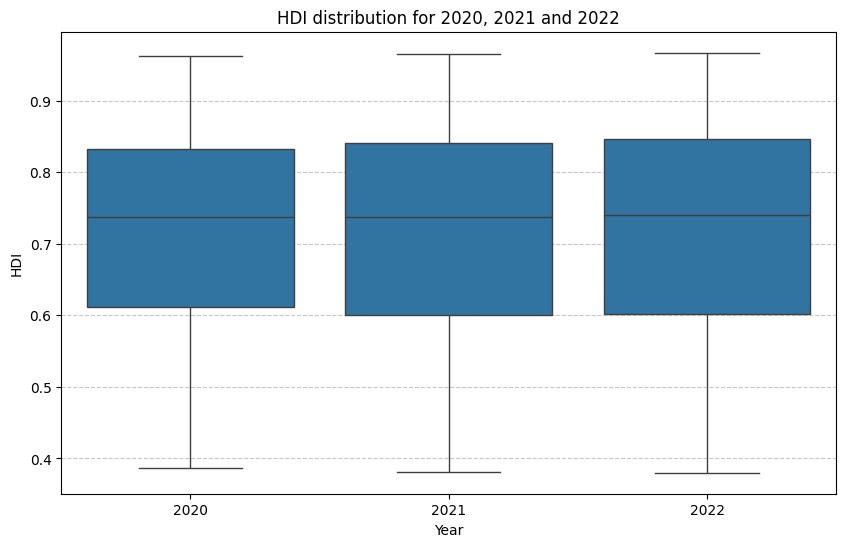

In [ ]:
# Box plot
import matplotlib.pyplot as plt
import seaborn as sns
# plotting box plot

plt.figure(figsize=(10,6))
sns.boxplot(x="year", y="hdi", data=hdi_problem1B_df)

plt.title("HDI distribution for 2020, 2021 and 2022")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Scatter Plot: HDI vs. GNI per Capita
∗ Check if the dataset contains a column for GNI per Capita.
∗ If available:
· Create a scatter plot using HDI as the dependent variable.
· Use GNI per Capita on the x-axis.
· Add a regression line (optional).
∗ If the variable is missing, write:
"GNI per Capita variable not available in the dataset."

In [ ]:
if "gross_inc_percap" in hdi_problem1B_df.columns:
  print("GNI per capita variable is available")
else:
  print("GNI per Capita variable not available in the dataset")

GNI per capita variable is available


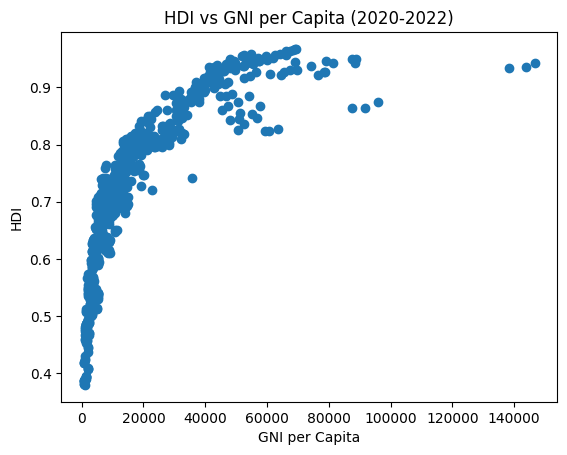

In [ ]:
# scatter plot
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(hdi_problem1B_df["gross_inc_percap"], hdi_problem1B_df["hdi"])

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("HDI vs GNI per Capita (2020-2022)")
plt.show()

4. Short Analysis Questions:
• Which countries show the greatest improvement in HDI from 2020 to 2022?
• Did any countries experience a decline in HDI? Provide possible reasons.
• Which region has the highest and lowest average HDI across these three years?
• Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI trends during
this period.

In [ ]:
# checking for the countries showing greates improvement in HDI

hdi_improvement = hdi_problem1B_df.pivot(index='country', columns='year', values='hdi')


hdi_improvement['HDI_Change'] = hdi_improvement[2022] - hdi_improvement[2020]


greatest_improvement = hdi_improvement['HDI_Change'].sort_values(ascending=False)
print(greatest_improvement.head(5))


country
Andorra       0.041
Azerbaijan    0.038
Ecuador       0.031
Maldives      0.025
Mexico        0.024
Name: HDI_Change, dtype: float64


From the analysis, It is found that countries: Andorra(0.041), Azerbaijan(0.038) and Ecuador(0.031) has shown the greatest improvement in HDI(2020-2021) . This indicates that these countries has progressed in each fields like: life expectancy, education and income levels in these past years.

In [ ]:
# Analysing decline in HDI
hdi_decline = hdi_improvement[hdi_improvement['HDI_Change'] < 0]
print(hdi_decline)


year                               2020   2021   2022  HDI_Change
country                                                          
Afghanistan                       0.488  0.473  0.462      -0.026
Angola                            0.594  0.590  0.591      -0.003
Australia                         0.948  0.949  0.946      -0.002
Belize                            0.705  0.698  0.700      -0.005
Brunei Darussalam                 0.827  0.824  0.823      -0.004
Bulgaria                          0.802  0.796  0.799      -0.003
Burkina Faso                      0.446  0.445  0.438      -0.008
Central African Republic          0.389  0.387  0.387      -0.002
Chad                              0.396  0.393  0.394      -0.002
Comoros                           0.588  0.585  0.586      -0.002
Congo                             0.598  0.598  0.593      -0.005
Costa Rica                        0.811  0.804  0.806      -0.005
Egypt                             0.729  0.726  0.728      -0.001
Eswatini (

From the analysis, there are number of countries that has experienced decline in hdi over these 3 years. The possib;e reasons for declination can be economic recession, political instabilty, natural disasters and Health issues .

In [ ]:
# Analysing highest and lowest average HDI in regions


 Average HDI in region:
Series([], Name: hdi, dtype: float64)


ValueError: attempt to get argmax of an empty sequence

From the analysis, there is significant differences in human development between regions. This may be due to differences in education access, health facilities, income and other factors.

The COVID_19 pandemic had a significant negative impact on HDI growth as it reduced life expectancy, disrupted education and economic growth.

In [ ]:
# Problem-2

1. Create South Asia Subset:
• Define the list of South Asian countries: ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Sri Lanka"].
• Filter the HDI dataset to include only these countries.
• Save the filtered dataset as HDI SouthAsia.csv and include this file in the final submission.

In [ ]:
import pandas as pd

# Loading dataset
df = pd.read_csv("/content/drive/MyDrive/Assignment/Human_Development_Index_Dataset.csv", encoding='latin1')

south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                        "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

hdi_SouthAsian_df = df.loc[df["country"].isin(south_asian_countries)].copy()
#saving filtered dataset to new csv file
hdi_SouthAsian_df.to_csv("/content/drive/MyDrive/Assignment/HDI_SouthAsia.csv", index=False)

2. Composite Development Score:
• Create a new metric called Composite Score using the formula:

Composite Score = 0.30 × Life Expectancy Index + 0.30 × GNI per Capita Index}
Here: Life Expectancy Index → "life expectancy" and GNI per Capita Index → "gross inc percap"
• Rank South Asian countries based on Composite Score.
• Plot the top 5 countries in a horizontal bar chart.
• Compare the ranking of countries by Composite Score with their HDI ranking and discuss any
differences.

In [ ]:
import matplotlib.pyplot as plt
# assigning function to group countries by decade
def decade_group(year):
    if 1990 <= year <= 1999:
        return "1990s"
    elif 2000 <= year <= 2009:
        return "2000s"
    elif 2010 <= year <= 2019:
        return "2010s"
    elif 2020 <= year <= 2022:
        return "2020s"
    else:
        return "Other"

hdi_SouthAsian_df["Decade"] = hdi_SouthAsian_df["year"].apply(decade_group)

# calculating Composite Development Score

hdi_SouthAsian_df["Composite_Score"] = (
    0.30 * hdi_SouthAsian_df["life_expectancy"] +
    0.30 * hdi_SouthAsian_df["gross_inc_percap"]
)




Top 5 South Asian Countries by Composite Score(1990s) :
country
Maldives     3024.723773
Sri Lanka    1472.435534
Pakistan      965.657045
Bhutan        909.574292
India         636.883028
Name: Composite_Score, dtype: float64


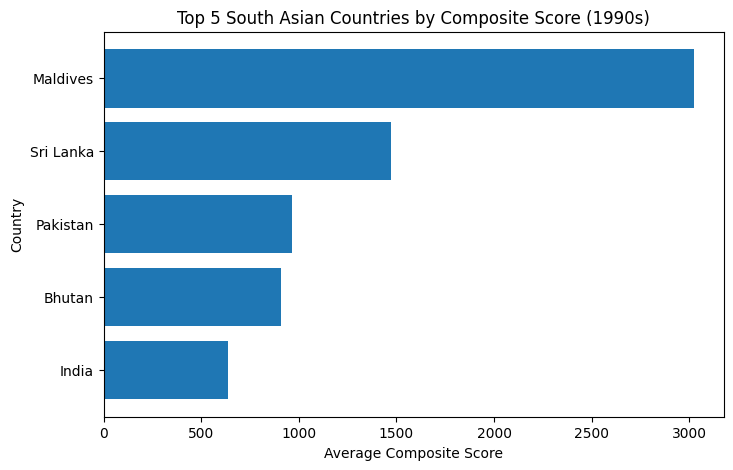

Top 5 South Asian Countries by Composite Score(2000s) :
country
Maldives     4273.809348
Sri Lanka    2137.544010
Bhutan       1626.280127
Pakistan     1112.312573
India         965.673484
Name: Composite_Score, dtype: float64


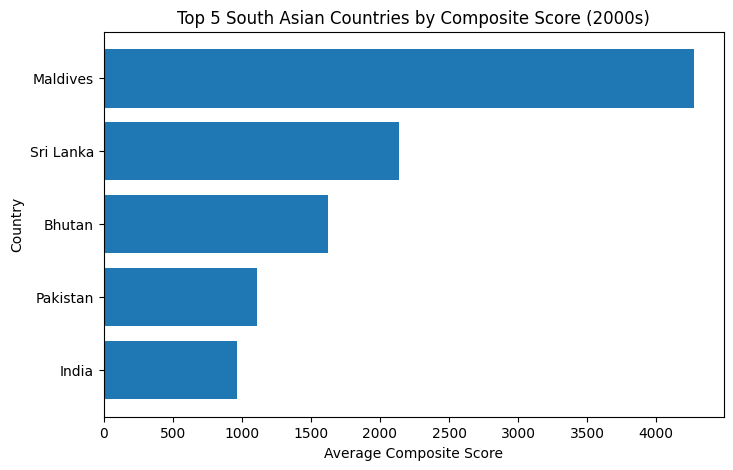

Top 5 South Asian Countries by Composite Score(2010s) :
country
Maldives      4962.203432
Sri Lanka     3518.317313
Bhutan        2733.270564
India         1602.444237
Bangladesh    1391.573452
Name: Composite_Score, dtype: float64


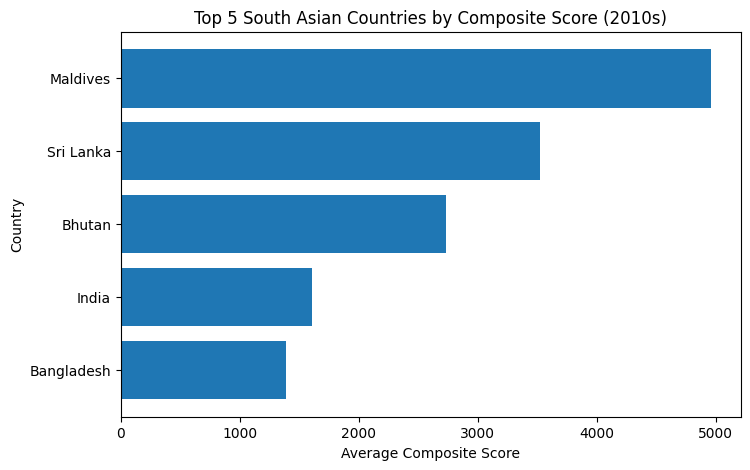

Top 5 South Asian Countries by Composite Score(2020s) :
country
Maldives      4827.657597
Sri Lanka     3767.752918
Bhutan        3097.787317
India         1978.776712
Bangladesh    1877.251264
Name: Composite_Score, dtype: float64


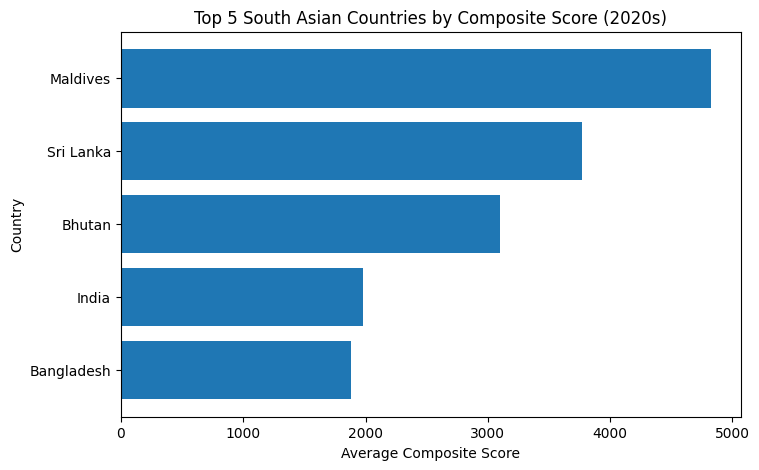

In [ ]:
# Ranking countries according to decade
decades = hdi_SouthAsian_df["Decade"].unique()
for decade in decades:
    decade_df = hdi_SouthAsian_df[hdi_SouthAsian_df["Decade"] == decade]
    # Compute average Composite Score across years in the decade
    avg_score = decade_df.groupby("country")["Composite_Score"].mean().sort_values(ascending=False)

    print(f"Top 5 South Asian Countries by Composite Score({decade}) :")
    print(avg_score.head(5))

# Plotting top 5 countries in each decade:
    top5_countries = avg_score.head(5)
    plt.figure(figsize=(8,5))
    plt.barh(top5_countries.index, top5_countries.values)
    plt.xlabel("Average Composite Score")
    plt.ylabel("Country")
    plt.title(f"Top 5 South Asian Countries by Composite Score ({decade})")
    plt.gca().invert_yaxis()
    plt.show()


Overally, Maldives always ranks first in each decade when ranked by composit score in South Asia. This strongly suggests that it has very high GNI per capita and has got good health facilities in the country. Likewise, Sri Lanka always ranks second in each decade that indicates it has good GNI per capita and good health facilities than other countries but not as good as in Maldives.

3. Outlier Detection:
• Detect outliers in HDI and GNI per Capita using the 1.5 × IQR rule.
• Create a scatter plot of GNI per Capita vs HDI, highlighting the outliers in a different color.
• Discuss why the identified countries stand out as outliers.

In [ ]:
# outliers detection
def find_outliers(hdi):
    Q1 = hdi.quantile(0.25)
    Q3 = hdi.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return hdi[(hdi < lower_bound) | (hdi > upper_bound)]

hdi_outliers = find_outliers(hdi_SouthAsian_df['hdi'])
print("Outliers in hdi:")
print(hdi_SouthAsian_df[hdi_SouthAsian_df["hdi"].isin(hdi_outliers)][['country','year','hdi','gross_inc_percap']])

gni_outliers = find_outliers(hdi_SouthAsian_df['gross_inc_percap'])
print("Outliers in gni:")
print(hdi_SouthAsian_df[hdi_SouthAsian_df["gross_inc_percap"].isin(gni_outliers)][['country','year','hdi','gross_inc_percap']])



Outliers in hdi:
Empty DataFrame
Columns: [country, year, hdi, gross_inc_percap]
Index: []
Outliers in gni:
        country  year    hdi  gross_inc_percap
3511   Maldives  2003  0.655       14543.14634
3512   Maldives  2004  0.656       15287.20714
3514   Maldives  2006  0.670       16391.40757
3515   Maldives  2007  0.670       14162.42816
3516   Maldives  2008  0.682       15423.81910
3517   Maldives  2009  0.684       14050.92438
3518   Maldives  2010  0.692       14363.23615
3519   Maldives  2011  0.701       15300.31364
3520   Maldives  2012  0.708       15355.44089
3521   Maldives  2013  0.715       15648.36655
3522   Maldives  2014  0.723       16410.16419
3523   Maldives  2015  0.728       16414.93039
3524   Maldives  2016  0.734       16911.45422
3525   Maldives  2017  0.740       17474.64201
3526   Maldives  2018  0.747       18055.72465
3527   Maldives  2019  0.753       18679.92536
3529   Maldives  2021  0.753       16857.60546
3530   Maldives  2022  0.762       18846.79219

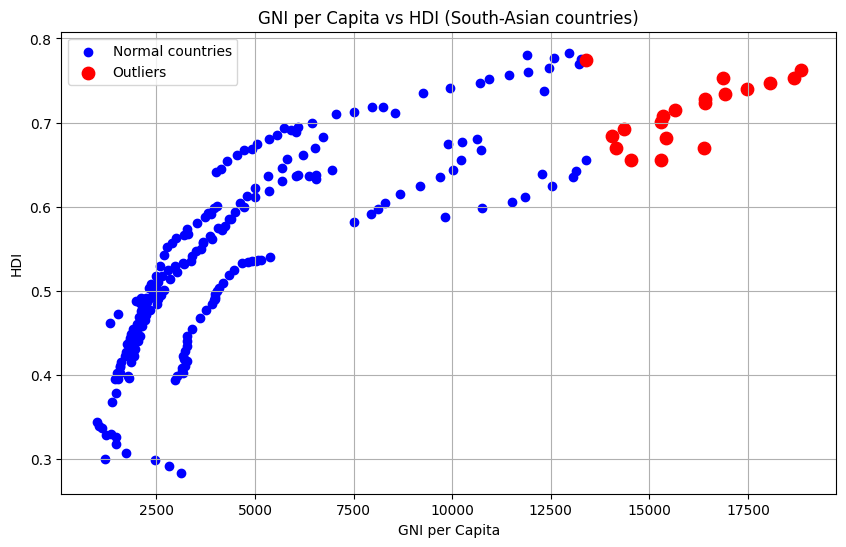

In [ ]:
# Scatter plot for outliers

import matplotlib.pyplot as plt

hdi_SouthAsian_df['HDI_outlier'] = hdi_SouthAsian_df['hdi'].isin(hdi_outliers)
hdi_SouthAsian_df['GNI_outlier'] = hdi_SouthAsian_df['gross_inc_percap'].isin(gni_outliers)
hdi_SouthAsian_df['Outlier'] = hdi_SouthAsian_df['HDI_outlier'] | hdi_SouthAsian_df['GNI_outlier']

non_outliers = hdi_SouthAsian_df[hdi_SouthAsian_df['Outlier'] == False]
outliers = hdi_SouthAsian_df[hdi_SouthAsian_df['Outlier'] == True]

plt.figure(figsize=(10,6))

# Non-outliers
plt.scatter(non_outliers["gross_inc_percap"], non_outliers["hdi"],
            color='blue', label='Normal countries')

# Outliers
plt.scatter(outliers["gross_inc_percap"], outliers["hdi"],
            color='red', label='Outliers', s=80)

plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("GNI per Capita vs HDI (South-Asian countries)")
plt.legend()
plt.grid(True)
plt.show()

In south Asian dataset, Maldives is identified as outlier because it's GNI is  relatively higher than other South Asian Countries because Maldives is thriving in tourism sector  that leads to relatively high per capita income. Also, Sri Lanka is also identified as a GNI outlier because it has diversified economy including tourism and Industry that leads to high per capita income.

4. Exploring Metric Relationships:
• Select two HDI components (e.g., Gender Development Index {"gender development"} and Life
Expectancy Index {"life expectancy"}).
• Compute Pearson correlation of each metric with HDI.
• Create scatter plots with trendlines to visualize the relationships.
• Discuss:
– Which metric is most strongly related to HDI and shows the weakest relationship with HDI.

In [ ]:
# calculating Pearson correlation

metrics = ["life_expectancy", "gender_development"]
correlations = hdi_SouthAsian_df[metrics + ["hdi"]].corr()["hdi"].drop("hdi")
print("Pearson Correlation of each metric with HDI:")
print(correlations)




Pearson Correlation of each metric with HDI:
life_expectancy       0.958761
gender_development    0.865621
Name: hdi, dtype: float64


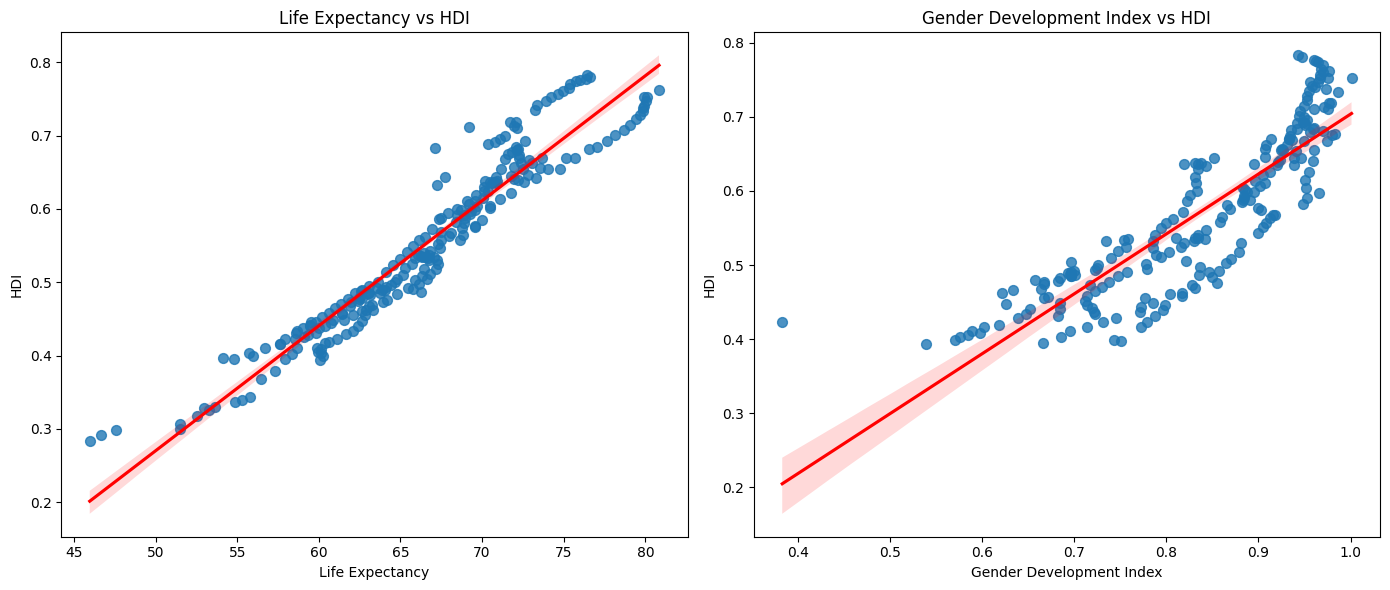

In [ ]:
# scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.regplot(x="life_expectancy", y="hdi", data=hdi_SouthAsian_df, scatter_kws={"s":50}, line_kws={"color":"red"})
plt.title("Life Expectancy vs HDI")
plt.xlabel("Life Expectancy")
plt.ylabel("HDI")

plt.subplot(1,2,2)
sns.regplot(x="gender_development", y="hdi", data=hdi_SouthAsian_df, scatter_kws={"s":50}, line_kws={"color":"red"})
plt.title("Gender Development Index vs HDI")
plt.xlabel("Gender Development Index")
plt.ylabel("HDI")

plt.tight_layout()
plt.show()

The  Life expectancy is strongly related to  HDI. A correlation of (0.958761) very close to 1, indicates that countries with high Life expectancy always have higher HDI. The weakest relationship with HDI is Gender Development Index, having correlation of (0.8656), suggests that Gender development also contributes to HDI but slightly less than Life expectancy.

5. Gap Analysis:
• Create a new metric:

GNI HDI Gap = "gross inc percap" − "hdi"
• Rank South Asian countries by GNI HDI Gap in descending and ascending order.
• Plot the top 3 positive gaps and top 3 negative gaps.
• Discuss the implications of the gap, e.g., cases where GNI is high but HDI is lower than expected.

In [ ]:
# Ranking South Asian countries by GNI_HDI_Gap
hdi_south_asia_mean = hdi_SouthAsian_df.groupby("country")[["gross_inc_percap", "hdi"]].mean()
hdi_south_asia_mean['GNI_HDI_GAP'] = hdi_south_asia_mean['gross_inc_percap'] - hdi_south_asia_mean['hdi']

# Rank South Asian countries by GNI HDI Gap in descending order
gap_desc = hdi_south_asia_mean.sort_values(by='GNI_HDI_GAP', ascending=False).reset_index()
print("\nGap in Descending Order")
print(gap_desc[['country','GNI_HDI_GAP']])

# Rank South Asian countries by GNI HDI Gap in ascending order
gap_asc = hdi_south_asia_mean.sort_values(by='GNI_HDI_GAP', ascending=True).reset_index()
print("\nGap in Ascending Order")
print(gap_asc[['country','GNI_HDI_GAP']])


Gap in Descending Order
       country   GNI_HDI_GAP
0     Maldives  13772.688785
1    Sri Lanka   8268.373527
2       Bhutan   6194.936904
3     Pakistan   3883.813530
4        India   3771.381346
5   Bangladesh   3408.490410
6        Nepal   2532.443971
7  Afghanistan   1793.487770

Gap in Ascending Order
       country   GNI_HDI_GAP
0  Afghanistan   1793.487770
1        Nepal   2532.443971
2   Bangladesh   3408.490410
3        India   3771.381346
4     Pakistan   3883.813530
5       Bhutan   6194.936904
6    Sri Lanka   8268.373527
7     Maldives  13772.688785


Text(0, 0.5, 'GNI HDI Gap')

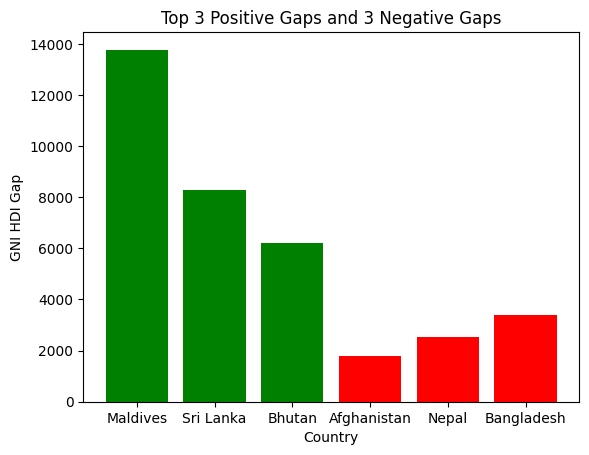

In [ ]:
# plotting top 3 positive gaps and top 3 negative gaps

positive_gap = gap_desc.head(3)
negative_gap = gap_asc.head(3)
plt.bar(positive_gap['country'],positive_gap['GNI_HDI_GAP'], color='green')
plt.bar(negative_gap['country'],negative_gap['GNI_HDI_GAP'],color='red')
plt.title("Top 3 Positive Gaps and 3 Negative Gaps")
plt.xlabel("Country")
plt.ylabel("GNI HDI Gap")

In [ ]:
# Problem-3

1. Create Middle East Subset:
• Define the list of Middle East countries: ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"].
• Filter the dataset from Problem 1B (HDI problem1B.csv) to create subsets for South Asia and
Middle East.
• Save these subsets as HDI SouthAsia 2020 2022.csv and HDI MiddleEast 2020 2022.csv for
use in subsequent tasks.

In [ ]:
import pandas as pd

# loading HDI problem1B.csv
problem1B_df = pd.read_csv("/content/drive/MyDrive/Assignment/HDI_problem1B.csv")

# List of south asian countires
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India",
                        "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
# lIst of middle east countries
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia",
                         "Syria", "United Arab Emirates", "Yemen"]
# Filtering the dataset
hdi_southasia_df = problem1B_df[problem1B_df["country"].isin(south_asian_countries)].copy()
hdi_middleeast_df = problem1B_df[problem1B_df["country"].isin(middle_east_countries)].copy()

# saving the filtered dataset
hdi_southasia_df.to_csv("/content/drive/MyDrive/Assignment/HDI_SouthAsia_2020_2022", index=False)
hdi_middleeast_df.to_csv("/content/drive/MyDrive/Assignment/HDI_MiddleEast_2020_2022", index=False)


2. Descriptive Statistics:
• Compute the mean and standard deviation of HDI for each region (South Asia vs Middle East)
across 2020–2022.
• Identify which region performs better on average.

In [ ]:
# statistics

south_asia_df = pd.read_csv("/content/drive/MyDrive/Assignment/HDI_SouthAsia_2020_2022")
middle_east_df = pd.read_csv("/content/drive/MyDrive/Assignment/HDI_MiddleEast_2020_2022")

# computing mean for both regions
south_asia_mean = south_asia_df["hdi"].mean()
print("Mean for South Asia:")
print(south_asia_mean)
middle_east_mean = middle_east_df["hdi"].mean()
print("Mean for Middle East:")
print(middle_east_mean)

# computing standard deviation for both region
south_asia_std = south_asia_df["hdi"].std()
print("Standard Deviation for South Asia:")
print(south_asia_std)
middle_east_std = middle_east_df["hdi"].std()
print("Standard Deviation for Middle East:")
print(middle_east_std)

Mean for South Asia:
0.6395833333333333
Mean for Middle East:
0.7889090909090909
Standard Deviation for South Asia:
0.09827331747496995
Standard Deviation for Middle East:
0.14129476362297624


On average, Middle East performs better because its HDI mean is relatively higher than South Asia's mean which indicates higher development in Middle East. similarly, The standard deviation of Middle East is higher than that of South Asia which indicates middle east countries are highly developed but there is more variation. Likewise, South Asian countries are less developed but has slightly more consistent HDI values.

3. Top and Bottom Performers:
• Identify the top 3 and bottom 3 countries in each region based on HDI.
• Create a bar chart comparing these top and bottom performers across the two regions.

In [ ]:
# Identifying the top 3 and bottom 3 countries in each region based on HDI.

southasia_hdi_avg = south_asia_df.groupby("country")["hdi"].mean().reset_index()
middleeast_hdi_avg = middle_east_df.groupby("country")["hdi"].mean().reset_index()


southasia_top3_countries = southasia_hdi_avg.sort_values("hdi", ascending=False).head(3)
southasia_bottom3_countries = southasia_hdi_avg.sort_values("hdi").head(3)
print("Top 3 performers for South Asia:")
print(southasia_top3_countries)
print("Bottom 3 performers for South Asia:")
print(southasia_bottom3_countries)

middleeast_top3_countries = middleeast_hdi_avg.sort_values("hdi", ascending=False).head(3)
middleeast_bottom3_countries = middleeast_hdi_avg.sort_values("hdi" ).head(3)

print("Top 3 performers for Middle East:")
print(middleeast_top3_countries)

print("Bottom 3 peformers for Middle East:")
print(middleeast_bottom3_countries)


Top 3 performers for South Asia:
     country       hdi
7  Sri Lanka  0.780000
4   Maldives  0.750667
2     Bhutan  0.677667
Bottom 3 performers for South Asia:
       country       hdi
0  Afghanistan  0.474333
6     Pakistan  0.537667
5        Nepal  0.595000
Top 3 performers for Middle East:
                country       hdi
9  United Arab Emirates  0.932667
2                Israel  0.910667
0               Bahrain  0.885333
Bottom 3 peformers for Middle East:
    country       hdi
10    Yemen  0.426333
1      Iraq  0.667000
5   Lebanon  0.730000


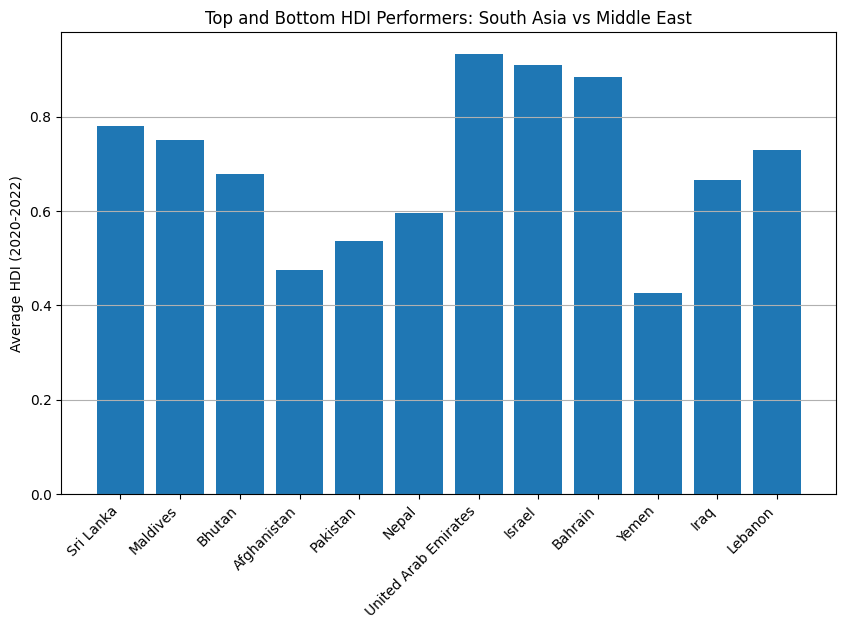

In [ ]:
# Bar chart
import matplotlib.pyplot as plt

top_bottom_df = pd.concat([
    southasia_top3_countries.assign(Region="South Asia"),
    southasia_bottom3_countries.assign(Region="South Asia"),
    middleeast_top3_countries.assign(Region="Middle East"),
    middleeast_bottom3_countries.assign(Region="Middle East")
])

plt.figure(figsize=(10,6))
plt.bar(top_bottom_df["country"], top_bottom_df["hdi"])

plt.xticks(rotation=45, ha="right")
plt.ylabel("Average HDI (2020-2022)")
plt.title("Top and Bottom HDI Performers: South Asia vs Middle East")
plt.grid(axis="y")

plt.show()

4. Metric Comparisons:
• Compare the following metrics across regions using grouped bar charts:
– Gender Development Index {"gender development"}
– Life Expectancy Index {"life expectancy"}
– GNI per Capita Index {"gross inc percap"}
• Identify which metric shows the greatest disparity between regions.

In [ ]:
# Grouped Bar chart
import matplotlib.pyplot as plt

southasia_gender = south_asia_df["gender_development"].mean()
middleeast_gender = middle_east_df["gender_development"].mean()

southasia_life = south_asia_df["life_expectancy"].mean()
middleeast_life = middle_east_df["life_expectancy"].mean()

southasia_gni = south_asia_df["gross_inc_percap"].mean()
middleeast_gni = middle_east_df["gross_inc_percap"].mean()




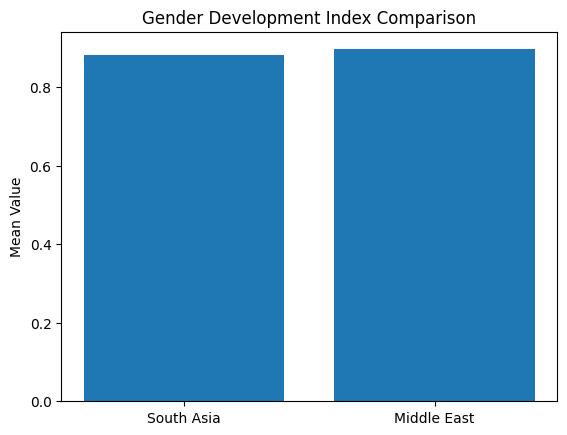

In [ ]:
# Gender Development Index
regions = ["South Asia", "Middle East"]
values = [southasia_gender, middleeast_gender]
plt.bar(regions, values)
plt.title("Gender Development Index Comparison")
plt.ylabel("Mean Value")
plt.show()

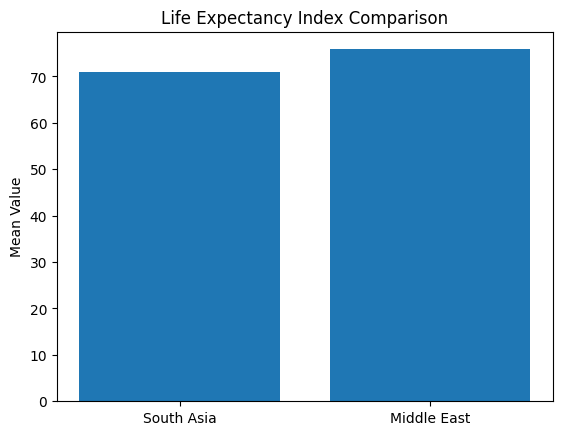

In [ ]:
# Life Expectancy Index
regions = ["South Asia", "Middle East"]
values = [southasia_life, middleeast_life]

plt.bar(regions, values)
plt.title("Life Expectancy Index Comparison")
plt.ylabel("Mean Value")
plt.show()


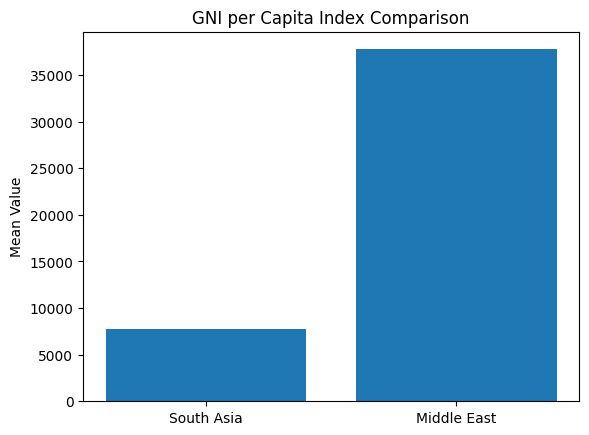

In [ ]:
# GNI per Capita Index
regions = ["South Asia", "Middle East"]
values = [southasia_gni, middleeast_gni]

plt.bar(regions, values)
plt.title("GNI per Capita Index Comparison")
plt.ylabel("Mean Value")
plt.show()

In [ ]:
# checking the greatest disparity between regions
gender_difference = abs(middleeast_gender - southasia_gender)
life_difference = abs(middleeast_life - southasia_life)
gni_difference = abs(middleeast_gni - southasia_gni)

print("Gender Development Index difference:", gender_difference)
print("Life Expectancy Index difference:", life_difference)
print("GNI per Capita Index difference:", gni_difference)

Gender Development Index difference: 0.01508712121212119
Life Expectancy Index difference: 4.885371212121214
GNI per Capita Index difference: 29984.260588178036


Among these three metrics, GNI per Capita Index shows the greatest disparity between South Asia and Middle East Regions.

5. HDI Disparity:
• Compute the range (max – min) of HDI for each region.
• Compute the coefficient of variation (CV = std/mean) for HDI.

• Identify which region exhibits more variation in HDI.

In [ ]:
# computing HDI range
southasia_hdi_range = south_asia_df["hdi"].max()-south_asia_df["hdi"].min()
middleeast_hdi_range = middle_east_df["hdi"].max()-middle_east_df["hdi"].min()

print("HDI Range for South Asia:")
print(southasia_hdi_range)

print("HDI Range for Middle East:")
print(middleeast_hdi_range)

HDI Range for South Asia:
0.321
HDI Range for Middle East:
0.5130000000000001


In [ ]:
# computing coefficient of variation
southasia_cv = south_asia_std / south_asia_mean
middleeast_cv = middle_east_std / middle_east_mean

print("coefficient of variation for South Asia:", southasia_cv)
print("coefficient of variation for Middle East:", middleeast_cv)


coefficient of variation for South Asia: 0.1536520924690084
coefficient of variation for Middle East: 0.17910145193048382


The Middle East region  exhibits more variation in HDI.

6. Correlation Analysis:
• For each region, compute correlations of HDI with:
– Gender Development Index
– Life Expectancy Index
• Create scatter plots with trendlines for each correlation.
• Interpret the strength and direction of these relationships.

In [ ]:
# computing correlations of HDI for South Asia
southasia_correlation_gender = south_asia_df["hdi"].corr(south_asia_df["gender_development"])
southasia_correlation_life = south_asia_df["hdi"].corr(south_asia_df["life_expectancy"])

print("correlation of HDI with Gender Development Index for South Asia:", southasia_correlation_gender)
print("correlation of HDI with Life Expectancy for South Asia:", southasia_correlation_life)



correlation of HDI with Gender Development Index for South Asia: 0.8742177004831327
correlation of HDI with Life Expectancy for South Asia: 0.9387641385416623


In [ ]:
# computing correlations of HDI for Middle East
middleeast_correlation_gender = middle_east_df["hdi"].corr(middle_east_df["gender_development"])
middleeast_correlation_life = middle_east_df["hdi"].corr(middle_east_df["life_expectancy"])

print("correlation of HDI with Gender Development Index for Middle East:", middleeast_correlation_gender)
print("correlation of HDI with Life Expectancy for Middle East:", middleeast_correlation_life)



correlation of HDI with Gender Development Index for Middle East: 0.9356697525724119
correlation of HDI with Life Expectancy for Middle East: 0.9331227568940162


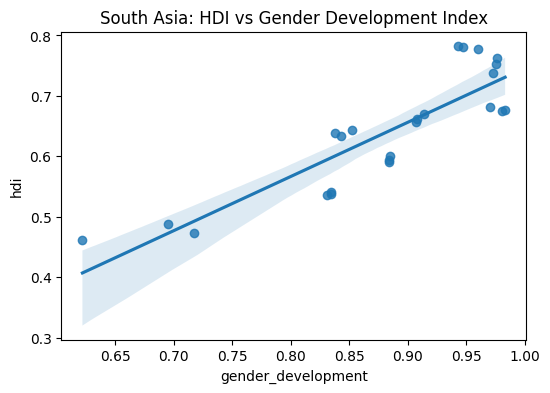

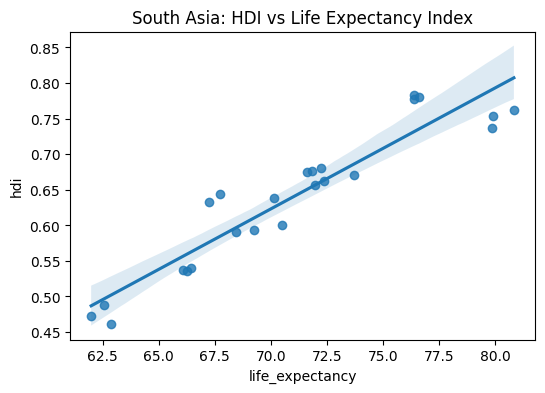

In [ ]:
# scatter plot for South Asia
import seaborn as sns
import matplotlib.pyplot as plt

# Gender Development Index

plt.figure(figsize=(6,4))
sns.regplot(x="gender_development", y="hdi", data=south_asia_df)
plt.title("South Asia: HDI vs Gender Development Index")
plt.show()

# Life Expectancy Index

plt.figure(figsize=(6,4))
sns.regplot(x="life_expectancy", y="hdi", data=south_asia_df)
plt.title("South Asia: HDI vs Life Expectancy Index")
plt.show()

The scatter plot of HDI vs Gender Development Index (South Asia) shows positive moderate to strong relationship between HDI and Gender Development Index.This indicates that gender equality contributes positively to HDI.
Likewise, The scatter plot between HDI and Life Expectancy (South Asia)shows strong and positive relation. The points are clustered closely around the the trendline, this indicates that life expectancy is a major contributor to HDI in this region.
Overally, comparing two metrics , Life Expectancy shows a stronger relationship with HDI than Gender Development Index in South Asia as data points are more closely clustered with the trendline.

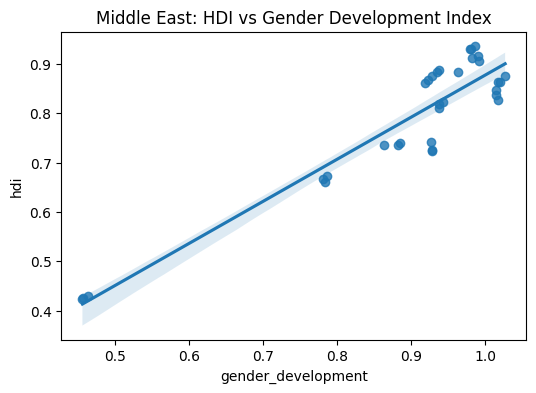

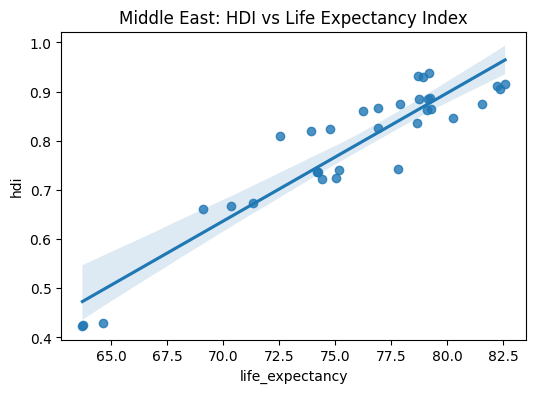

In [ ]:
# scatter plot for Middle East
import seaborn as sns
import matplotlib.pyplot as plt

# Gender Development Index

plt.figure(figsize=(6,4))
sns.regplot(x="gender_development", y="hdi", data=middle_east_df)
plt.title("Middle East: HDI vs Gender Development Index")
plt.show()

# Life Expectancy Index

plt.figure(figsize=(6,4))
sns.regplot(x="life_expectancy", y="hdi", data=middle_east_df)
plt.title("Middle East: HDI vs Life Expectancy Index")
plt.show()

7. Outlier Detection:
• Detect outliers in HDI {"hdi"} and GNI per Capita {"gross inc percap"} for each region using
the 1.5 × IQR rule.
• Create scatter plots highlighting outliers in a different color.
• Discuss the significance of these outliers.


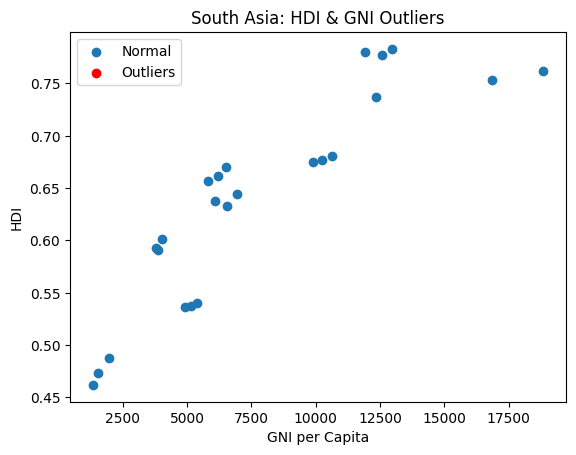

In [ ]:
# Outlier Detection
# South Asia
Q1_sa = hdi_southasia_df["hdi"].quantile(0.25)
Q3_sa = hdi_southasia_df["hdi"].quantile(0.75)
IQR_sa = Q3_sa - Q1_sa
outliers_sa = hdi_southasia_df[(hdi_southasia_df["hdi"] < Q1_sa - 1.5*IQR_sa) | (hdi_southasia_df["hdi"] > Q3_sa + 1.5*IQR_sa)]

plt.scatter(hdi_southasia_df["gross_inc_percap"], hdi_southasia_df["hdi"], label="Normal")
plt.scatter(outliers_sa["gross_inc_percap"], outliers_sa["hdi"], color="red", label="Outliers")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("South Asia: HDI & GNI Outliers")
plt.legend()
plt.show()



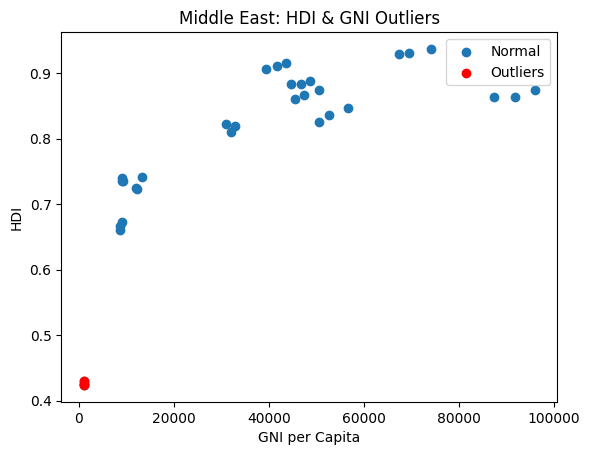

In [ ]:
# Outlier detection
# Middle east
Q1_me = hdi_middleeast_df["hdi"].quantile(0.25)
Q3_me = hdi_middleeast_df["hdi"].quantile(0.75)
IQR_me = Q3_me - Q1_me

outliers_me = hdi_middleeast_df[(hdi_middleeast_df["hdi"] < Q1_me - 1.5*IQR_me) |(hdi_middleeast_df["hdi"] > Q3_me + 1.5*IQR_me)]

plt.scatter(hdi_middleeast_df["gross_inc_percap"], hdi_middleeast_df["hdi"], label="Normal")
plt.scatter(outliers_me["gross_inc_percap"], outliers_me["hdi"], color="red", label="Outliers")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("Middle East: HDI & GNI Outliers")
plt.legend()
plt.show()